In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
%config Completer.use_jedi = False
#Command to stop autocompletion from taking eternity

### List of names of classes

In [2]:
classes_names_indiana_pines = ["Alfalfa", "Corn-notill", 
"Corn-mintill", "Corn", "Grass-pasture", "Grass-trees",
"Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill",
"Soybean-mintill", "Soybean-clean", "Wheat", "Woods", 
"Buildings-grass-Trees-Drives", "Stone-Steel-Towers"]

classes_names_salinas = ["Brocoli_green_weeds_1", 
"Brocoli_green_weeds_2", "Fallow", "Fallow_rough_plow", 
"Fallow_smooth", "Stubble", "Celery", "Grapes_untrained",
"Soil_vinyard_develop", "Corn_senesced_green_weeds", "Lettuce_romaine_4wk", 
"Lettuce_romaine_5wk", "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", 
"Vinyard_untrained", "Vinyard_vertical_trellis"]

### Load and Display Images

In [3]:
salinas = np.load('salinas.npy', allow_pickle=True)
salinas_gt = np.load('salinas_gt.npy', allow_pickle=True)
print(salinas.shape)
print(salinas_gt.shape)

(512, 217, 204)
(512, 217)


In [4]:
indiana_pines = np.load('indianapines.npy', allow_pickle=True)
indiana_pines_gt = np.load('indianapines_gt.npy', allow_pickle=True)
print(indiana_pines.shape)
print(indiana_pines_gt.shape)

(145, 145, 200)
(145, 145)


In [5]:
def plot_RGB(image):
    imageRGB = np.array(image[:, :, [30, 15, 2]], dtype=float)

    pmin,pmax = np.percentile(imageRGB, (1,99), axis=(0,1))
    print(pmin, pmax)
    imageRGB_pimped = imageRGB.copy()

    for i in range(pmin.size):
        imageRGB_pimped[:,:,i] = (imageRGB[:,:,i] - pmin[i]) / (pmax[i] - pmin[i])

    imageRGB_pimped[imageRGB_pimped < 0] = 0
    imageRGB_pimped[imageRGB_pimped > 1] = 1

    plt.figure(figsize=(5,5))
    plt.imshow(imageRGB_pimped)
    plt.show()

[ 600. 1045.  474.] [3747. 3107.  927.]


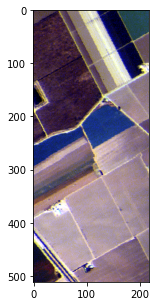

In [6]:
plot_RGB(salinas)

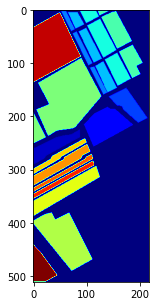

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(salinas_gt, cmap='jet')

[2353. 2761. 3833.] [5442.   6051.76 4946.  ]


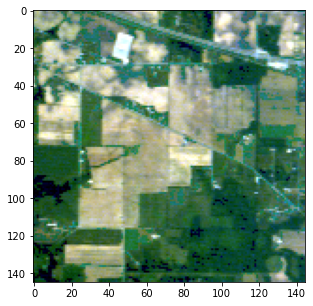

In [8]:
plot_RGB(indiana_pines)

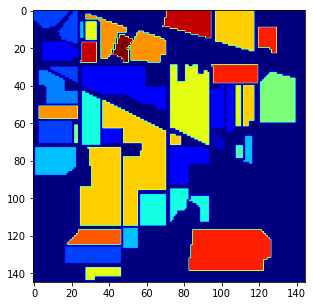

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(indiana_pines_gt, cmap='jet')

### PCA

In [10]:
def flatten_image(X):
    return X.reshape((-1, X.shape[-1]))

X1 = flatten_image(salinas)
Y1 = salinas_gt.flatten()

X1 = X1[Y1!=0]
Y1 = Y1[Y1!=0]
Y1 = Y1 - 1
values, count = np.unique(Y1, return_counts=True)
print(values, '\n', count)
print(X1.shape)
print(Y1.shape)

X2 = flatten_image(indiana_pines)
Y2 = indiana_pines_gt.flatten()

X2 = X2[Y2!=0]
Y2 = Y2[Y2!=0]
Y2 = Y2 - 1
print(X2.shape)
print(Y2.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 [ 2009  3726  1976  1394  2678  3959  3579 11271  6203  3278  1068  1927
   916  1070  7268  1807]
(54129, 204)
(54129,)
(10249, 200)
(10249,)


In [11]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=1, stratify=Y1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=1, stratify=Y2)
print(X1_train.shape)

(43303, 204)


### Classifier

In [12]:
from sklearn.utils import class_weight
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

### One vs rest classifier

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline

### One vs one classifier


In [14]:
from sklearn.multiclass import OneVsOneClassifier

In [343]:
pipeline_one_vs_one = OneVsOneClassifier(
    RandomForestClassifier(n_jobs=6, max_features=4, n_estimators=500), n_jobs=6)


In [15]:
from sklearn.ensemble import RandomForestClassifier
base_model = RandomForestClassifier(n_jobs=6, class_weight=class_weights1)

NameError: name 'class_weights1' is not defined

In [16]:
from sklearn.decomposition import PCA
pipe_salinas = Pipeline([('pca', PCA(n_components=17)), 
    ('forest', RandomForestClassifier(n_jobs=6, max_features=4, n_estimators=500, class_weight=None))])

In [17]:
pipe_onevsone_pca = Pipeline([('pca', PCA(n_components=17)), 
    ('forest', RandomForestClassifier(n_jobs=6, max_features=4, n_estimators=500, class_weight=None))])
pipe_onevsone_pca = OneVsOneClassifier(pipe_onevsone_pca, n_jobs=6)

In [18]:
pipe_indianas = Pipeline([('pca', PCA(n_components=19)), 
    ('forest', RandomForestClassifier(n_jobs=6, max_features=6, n_estimators=500, class_weight="balanced"))])

In [19]:
pipe_onevsone_indianas = Pipeline([('pca', PCA(n_components=19)), 
    ('forest', RandomForestClassifier(n_jobs=6, max_features=4, n_estimators=500, class_weight=None))])
pipe_onevsone_indianas = OneVsOneClassifier(pipe_onevsone_indianas, n_jobs=6)

### Fit

In [131]:
pipe_indianas = pipe_onevsone_indianas

In [22]:
%%time
pipe_salinas.fit(X1_train, Y1_train)
pipe_salinas.score(X1_test, Y1_test)

CPU times: user 1min 1s, sys: 2.46 s, total: 1min 3s
Wall time: 10.3 s


0.9661924995381489

In [21]:
%%time
pipe_indianas.fit(X2_train, Y2_train)
pipe_indianas.score(X2_test, Y2_test)

CPU times: user 18 s, sys: 1.63 s, total: 19.7 s
Wall time: 3.2 s


0.8390243902439024

In [90]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
pipe = pipe_salinas

grid_params = {
    # Key = step name from pipeline + __ + hyperparameter, value = tuple of possible values
    'forest__max_features': [3, 4, 5],
    'pca__n_components': [15, 17, 18, 20, 22, 24, 25],
    'forest__n_estimators': [100, 200, 500]
}

cv = StratifiedKFold(n_splits=3)
# Instantiate new gridsearch object
# gs = GridSearchCV(estimator=pipe, param_grid=grid_params, cv=cv, n_jobs=6, verbose=4)
#gs = RandomizedSearchCV(estimator=pipe, param_distributions=grid_params, n_iter=10, cv=cv, n_jobs=6, verbose=4)
gs = HalvingGridSearchCV(estimator=pipe, param_grid=grid_params, cv=cv, n_jobs=6, verbose=4)
# Fit model to our training data
gs.fit(X1_train, Y1_train)

# Score the model on our testing data
gs.score(X1_test, Y1_test)


n_iterations: 2
n_required_iterations: 4
n_possible_iterations: 2
min_resources_: 5412
max_resources_: 43303
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 60
n_resources: 5412
Fitting 3 folds for each of 60 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 20
n_resources: 16236
Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: user 27 s, sys: 6.4 s, total: 33.4 s
Wall time: 1min 46s


0.9653611675595788

In [106]:
%%time
pipe = pipe_indianas
grid_params = {
    'forest__max_features': [4,5, 6, 7, 8, 10],
    'pca__n_components': [15, 18, 19, 20, 21, 23, 25, 30, 40, 50, 60, 70, 90, 110],
    'forest__n_estimators': [100]
}

cv = StratifiedKFold(n_splits=3)
gs = HalvingGridSearchCV(estimator=pipe, param_grid=grid_params, cv=cv, n_jobs=6, verbose=4, min_resources=len(X2_train) // 4)

gs.fit(X2_train, Y2_train)

gs.score(X2_test, Y2_test)

n_iterations: 2
n_required_iterations: 5
n_possible_iterations: 2
min_resources_: 2049
max_resources_: 8199
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 84
n_resources: 2049
Fitting 3 folds for each of 84 candidates, totalling 252 fits
----------
iter: 1
n_candidates: 28
n_resources: 6147
Fitting 3 folds for each of 28 candidates, totalling 84 fits
CPU times: user 7.43 s, sys: 5.36 s, total: 12.8 s
Wall time: 1min 2s


0.8336585365853658

In [107]:
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
df

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_features,param_forest__n_estimators,param_pca__n_components,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,2049,0.539293,0.008922,0.117255,0.009663,4,100,15,"{'forest__max_features': 4, 'forest__n_estimat...",...,0.718887,0.729136,0.720351,0.006656,74,1.0,1.000000,1.000000,1.000000,0.000000
1,0,2049,0.524365,0.000773,0.113364,0.011918,4,100,18,"{'forest__max_features': 4, 'forest__n_estimat...",...,0.736457,0.724744,0.725232,0.008973,47,1.0,1.000000,1.000000,1.000000,0.000000
2,0,2049,0.524697,0.009975,0.115770,0.009595,4,100,19,"{'forest__max_features': 4, 'forest__n_estimat...",...,0.732064,0.736457,0.725232,0.012894,48,1.0,1.000000,1.000000,1.000000,0.000000
3,0,2049,0.501611,0.013405,0.118935,0.002574,4,100,20,"{'forest__max_features': 4, 'forest__n_estimat...",...,0.730600,0.737921,0.724744,0.013787,49,1.0,1.000000,1.000000,1.000000,0.000000
4,0,2049,0.509724,0.017882,0.115342,0.006088,4,100,21,"{'forest__max_features': 4, 'forest__n_estimat...",...,0.724744,0.732064,0.720351,0.011774,72,1.0,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,6147,1.261009,0.084298,0.126841,0.006869,6,100,21,"{'forest__max_features': 6, 'forest__n_estimat...",...,0.805271,0.783797,0.794046,0.008794,13,1.0,1.000000,1.000000,1.000000,0.000000
108,1,6147,1.567072,0.092441,0.138770,0.006981,8,100,21,"{'forest__max_features': 8, 'forest__n_estimat...",...,0.808687,0.782821,0.794209,0.010784,10,1.0,0.999756,1.000000,0.999919,0.000115
109,1,6147,1.446629,0.140010,0.132913,0.002288,6,100,19,"{'forest__max_features': 6, 'forest__n_estimat...",...,0.811127,0.793070,0.799902,0.008000,1,1.0,1.000000,0.999756,0.999919,0.000115
110,1,6147,1.147032,0.106903,0.143665,0.005628,5,100,23,"{'forest__max_features': 5, 'forest__n_estimat...",...,0.809663,0.782821,0.791280,0.013012,24,1.0,1.000000,0.999512,0.999837,0.000230


In [108]:
print(gs.best_params_)

{'forest__max_features': 6, 'forest__n_estimators': 100, 'pca__n_components': 19}


In [259]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(clf, class_names=classes_names_salinas)
plt.show()

KeyboardInterrupt: 

### Testing

In [53]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [75]:
def plot_classification_and_confusion_matrix(clf, X_test, Y_test, class_names):
    print(clf.score(X_test, Y_test))
    print(classification_report(Y_test, clf.predict(X_test), target_names=class_names))

    fig, ax = plt.subplots(figsize=(25, 10))
    plot_confusion_matrix(clf, X_test, Y_test, ax=ax, display_labels=class_names)
    plt.show()

0.9653611675595788
                           precision    recall  f1-score   support

    Brocoli_green_weeds_1       1.00      1.00      1.00       402
    Brocoli_green_weeds_2       1.00      1.00      1.00       745
                   Fallow       0.99      1.00      1.00       395
        Fallow_rough_plow       1.00      1.00      1.00       279
            Fallow_smooth       1.00      1.00      1.00       536
                  Stubble       1.00      1.00      1.00       792
                   Celery       1.00      1.00      1.00       716
         Grapes_untrained       0.90      0.95      0.92      2254
     Soil_vinyard_develop       1.00      1.00      1.00      1241
Corn_senesced_green_weeds       0.99      0.99      0.99       656
      Lettuce_romaine_4wk       1.00      0.98      0.99       213
      Lettuce_romaine_5wk       0.99      1.00      1.00       385
      Lettuce_romaine_6wk       0.99      1.00      1.00       183
      Lettuce_romaine_7wk       1.00      

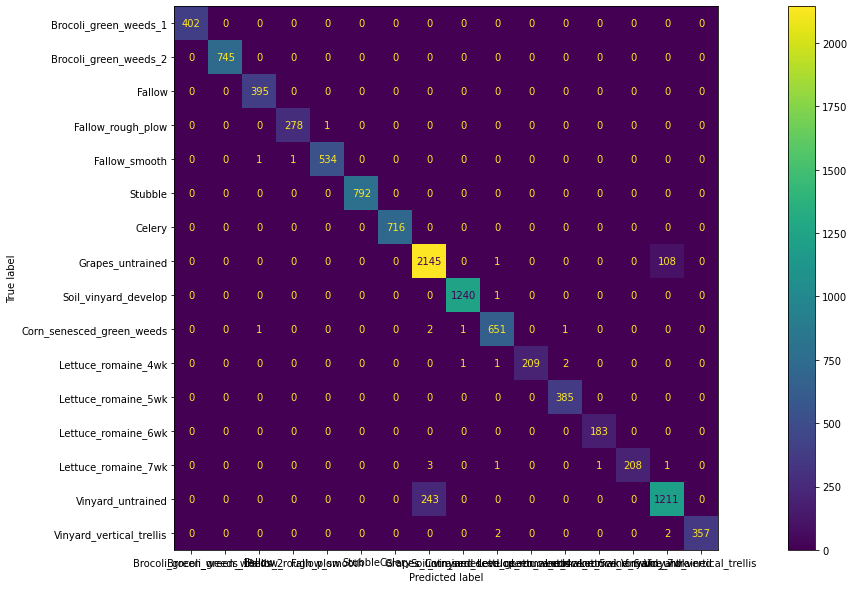

In [93]:
plot_classification_and_confusion_matrix(pipe_salinas, X1_test, Y1_test, classes_names_salinas)

0.8404878048780487
                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.67      0.80         9
                 Corn-notill       0.78      0.74      0.76       286
                Corn-mintill       0.84      0.67      0.74       166
                        Corn       0.77      0.64      0.70        47
               Grass-pasture       0.93      0.92      0.92        97
                 Grass-trees       0.92      0.97      0.94       146
         Grass-pasture-mowed       0.83      1.00      0.91         5
               Hay-windrowed       0.97      1.00      0.98        96
                        Oats       1.00      1.00      1.00         4
              Soybean-notill       0.81      0.80      0.80       194
             Soybean-mintill       0.79      0.89      0.84       491
               Soybean-clean       0.79      0.70      0.74       119
                       Wheat       0.95      0.98      0.96        41


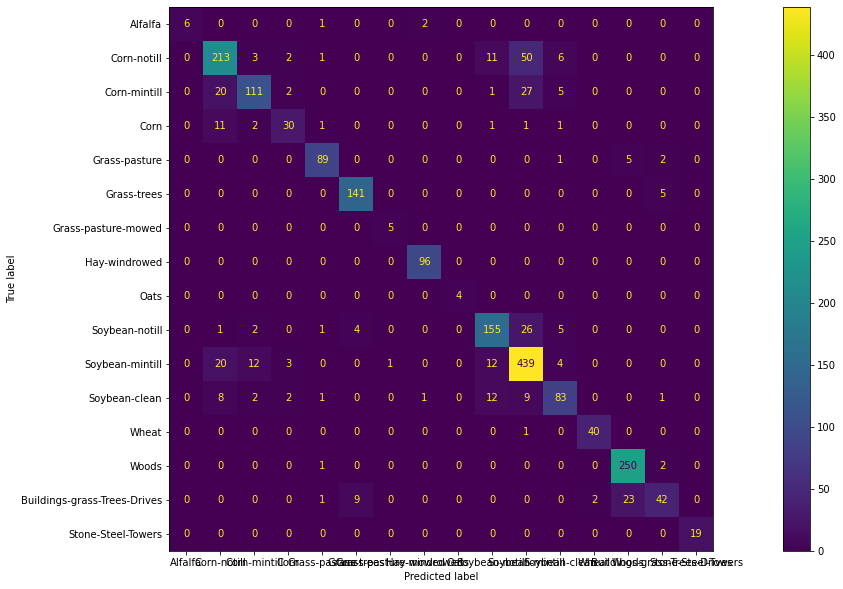

In [146]:
plot_classification_and_confusion_matrix(pipe_indianas, X2_test, Y2_test, classes_names_indiana_pines)

In [39]:
def reconstruct_image(ground_truth, prediction):    
    original_img = ground_truth.flatten()
    idx = np.where(original_img != 0)[0]
    original_img[idx] = prediction
    return np.reshape(original_img, ground_truth.shape)

(54129,)


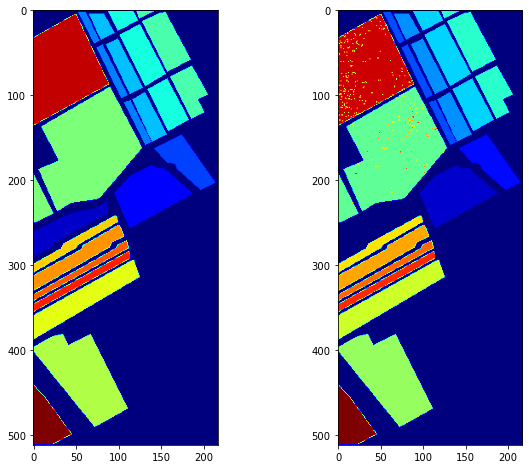

In [40]:
y1_predict = pipe_salinas.predict(X1)
print(y1_predict.shape)

reconstructed_img_salinas = reconstruct_image(salinas_gt, y1_predict)

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(salinas_gt, cmap='jet')

plt.subplot(122)
plt.imshow(reconstructed_img_salinas, cmap='jet')
plt.show()

(54129, 204) (10249, 200) (8199, 200)
(10249,)


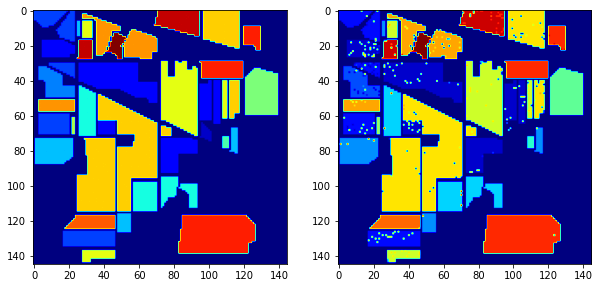

In [41]:
print(X1.shape, X2.shape, X2_train.shape)
y2_predict = pipe_indianas.predict(X2)
print(y2_predict.shape)

reconstructed_img_indiana = reconstruct_image(indiana_pines_gt, y2_predict)

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(indiana_pines_gt, cmap='jet')

plt.subplot(122)
plt.imshow(reconstructed_img_indiana, cmap='jet')
plt.show()

In [264]:
def display_each_class(clf, X, ground_truth, name_classes, nb_col):
    y_predict = clf.predict(X)
    y_predict_reshaped = y_predict.reshape((ground_truth.shape))
    
    nb_classes = np.size(name_classes)
    nb_row = (nb_classes * 2 // nb_col) + 1
    print(nb_row, nb_col, nb_classes)
    index = 0
    plt.figure(figsize=(15,18))
    fig, axes = plt.subplots(nb_row, nb_col, figsize=(10,20))
    
    axes = axes.ravel()
    
    for i in range(nb_classes):
        axes[index].imshow(np.where(ground_truth != i, 1, 0), cmap="jet")
        axes[index].title.set_text(name_classes[i])
        axes[index].set_xticklabels([])
        axes[index].set_yticklabels([])
        index += 1
        
        axes[index].imshow(np.where(y_predict_reshaped != i, 1, 0), cmap="jet")
        axes[index].set_xticklabels([])
        axes[index].set_yticklabels([])
        index += 1
    plt.show()
    

6 6 17


<Figure size 1080x1296 with 0 Axes>

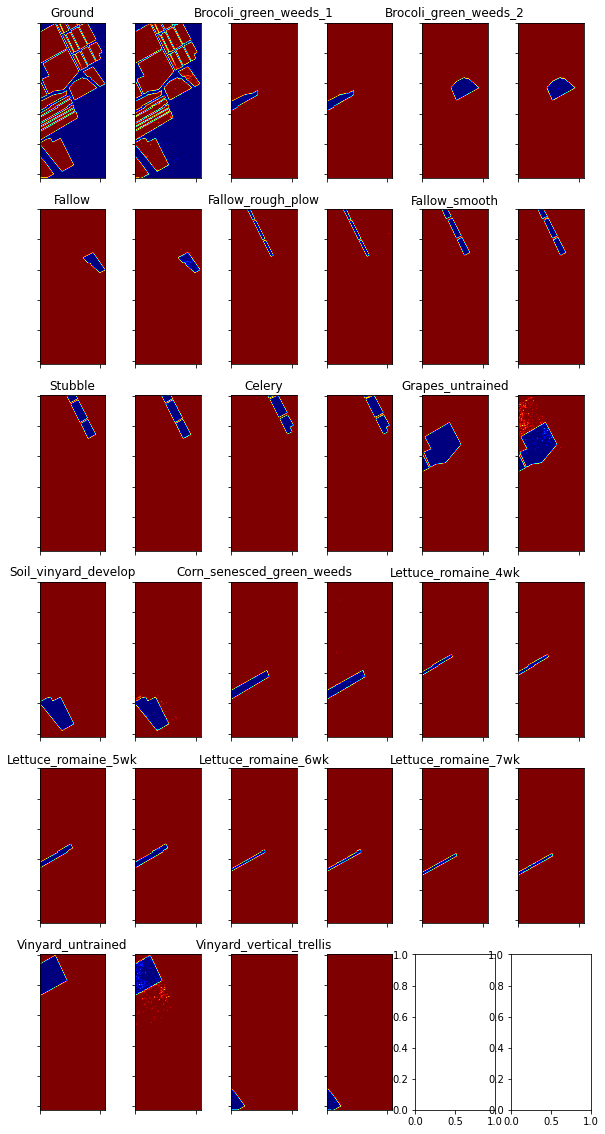

In [332]:
display_each_class(clf, X1, salinas_gt, classes_names_salinas, nb_col=6)

In [43]:
from skimage.morphology import opening, closing
from skimage import morphology as morpho

ModuleNotFoundError: No module named 'skimage'

In [44]:
y1_pred_rc = closing(reconstructed_img_salinas, morpho.diamond(1))
y1_pred_rc = opening(y1_pred_rc, morpho.diamond(1))

tmp = y1_pred_rc.flatten()
print(tmp.shape)
tmp = tmp[salinas_gt.flatten()!=0]
values, count = np.unique(tmp, return_counts=True)
print(values, '\n', count)
print(tmp.shape)
print(Y1.shape)
print(classification_report(Y1, tmp))
#print(classification_report(Y1, y1_predict))

plt.figure(figsize=(5,5))
plt.imshow(y1_pred_rc, cmap='jet')
plt.show()

NameError: name 'closing' is not defined

In [172]:
y2_pred_rc = closing(reconstructed_img_indiana, morpho.diamond(1))
y2_pred_rc = opening(y2_pred_rc, morpho.diamond(1))

tmp = y2_pred_rc.flatten()
print(tmp.shape)
tmp = tmp[indiana_pines_gt.flatten()!=0]
values, count = np.unique(tmp, return_counts=True)
print(values, '\n', count)
print(tmp.shape)
print(Y2.shape)
print(classification_report(Y2, tmp))
#print(classification_report(Y1, y1_predict))

plt.figure(figsize=(5,5))
plt.imshow(y2_pred_rc, cmap='jet')
plt.show()

(21025,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] 
 [  99 1416  847  237  481  743   24  475   14  969 2453  578  201 1255
  370   87]
(10249,)
(21025,)


ValueError: Found input variables with inconsistent numbers of samples: [21025, 10249]